In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [6]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144     True
145    False
146    False
147    False
Length: 148, dtype: bool

In [8]:

df1=df.drop_duplicates()
df1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1



4 duplicate rows removed

In [9]:

df1.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

The columns "Company","Age","Salary","Place" is having a few null values. For categorical columns we can replace null value with mode. 

In [11]:
df1["Company"]=df1["Company"].fillna("TCS")
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_7364\4202730419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Company"]=df1["Company"].fillna("TCS")


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [12]:
df1["Place"]=df1["Place"].fillna("Mumbai")
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_7364\1734556963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Place"]=df1["Place"].fillna("Mumbai")


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Checking outliers

In [16]:
df1["Age"].mean()

30.52755905511811

In [13]:
df1["Age"].median()

33.0

### The mean and median of "Age" and "Salary" are almost the same,means there are no outliers. So we can replace null values with mean

In [18]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean().round(2))
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_7364\2963897606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"]=df1["Age"].fillna(df1["Age"].mean().round(2))


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.47,Chennai,India,0
1,Infosys,30.0,5283.47,Mumbai,India,0
2,TCS,35.0,2300.00,Calcutta,India,0
3,Infosys,40.0,3000.00,Delhi,India,0
4,TCS,23.0,4000.00,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,India,0
143,TCS,33.0,9024.00,Calcutta,India,1
145,Infosys,44.0,4034.00,Delhi,India,1
146,TCS,33.0,5034.00,Mumbai,India,1


In [14]:

df1["Salary"].mean()

5283.471074380165

In [17]:
df1["Salary"]=df1["Salary"].fillna(df1["Salary"].mean().round(2))
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_7364\2453181590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Salary"]=df1["Salary"].fillna(df1["Salary"].mean().round(2))


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.47,Chennai,India,0
1,Infosys,30.0,5283.47,Mumbai,India,0
2,TCS,35.0,2300.00,Calcutta,India,0
3,Infosys,40.0,3000.00,Delhi,India,0
4,TCS,23.0,4000.00,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,India,0
143,TCS,33.0,9024.00,Calcutta,India,1
145,Infosys,44.0,4034.00,Delhi,India,1
146,TCS,33.0,5034.00,Mumbai,India,1


In [19]:
df1.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [20]:
df1["Place"].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [21]:

df1["Age"].unique()

array([20.  , 30.  , 35.  , 40.  , 23.  , 30.53, 34.  , 45.  , 18.  ,
       22.  , 32.  , 37.  , 50.  , 21.  , 46.  , 36.  , 26.  , 41.  ,
       24.  , 25.  , 43.  , 19.  , 38.  , 51.  , 31.  , 44.  , 33.  ,
       17.  ,  0.  , 54.  ])

In [25]:
df1["Age"].replace(0.,df1["Age"].mean())

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 144, dtype: float64

In [28]:

df1["Country"].unique()

array(['India'], dtype=object)

In [29]:
df1.drop(columns="Country",inplace=True)
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_7364\3100225727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns="Country",inplace=True)


,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.47,Chennai,0
1,Infosys,30.0,5283.47,Mumbai,0
2,TCS,35.0,2300.00,Calcutta,0
3,Infosys,40.0,3000.00,Delhi,0
4,TCS,23.0,4000.00,Mumbai,0
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,0
143,TCS,33.0,9024.00,Calcutta,1
145,Infosys,44.0,4034.00,Delhi,1
146,TCS,33.0,5034.00,Mumbai,1


#### Data cleaning is done and the following changes were made:
1. Removed 4  duplicate rows
2. Removed country a column with only one unique val indiaue
3. Corrected a spelling mistake in a data
4. Replaced null values with mean and 
5.  checked outliersth NaN

## Data Analysiss

In [30]:
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.47,Chennai,0
1,Infosys,30.0,5283.47,Mumbai,0
2,TCS,35.0,2300.00,Calcutta,0
3,Infosys,40.0,3000.00,Delhi,0
4,TCS,23.0,4000.00,Mumbai,0
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.00,Mumbai,0
143,TCS,33.0,9024.00,Calcutta,1
145,Infosys,44.0,4034.00,Delhi,1
146,TCS,33.0,5034.00,Mumbai,1


In [31]:

df3= df1.drop(["Company","Place","Gender"], axis=1)
df3

,Age,Salary
0,20.0,5283.47
1,30.0,5283.47
2,35.0,2300.00
3,40.0,3000.00
4,23.0,4000.00
...,...,...
142,22.0,8202.00
143,33.0,9024.00
145,44.0,4034.00
146,33.0,5034.00


In [32]:

df3.corr()

,Age,Salary
Age,1.000000,0.071822
Salary,0.071822,1.000000


<Axes: >

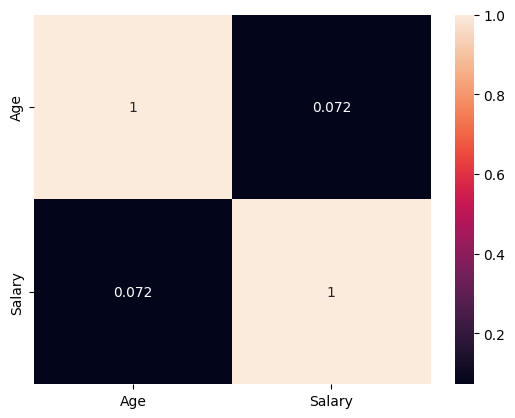

In [33]:
import seaborn as sns
sns.heatmap(df3.corr(),annot=True)

In [35]:
count=df1["Place"].value_counts()
df5=pd.DataFrame({"Place":count.index,"No_of_ppl":count.values})
df5

,Place,No_of_ppl
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


In [37]:
import matplotlib.pyplot as plt

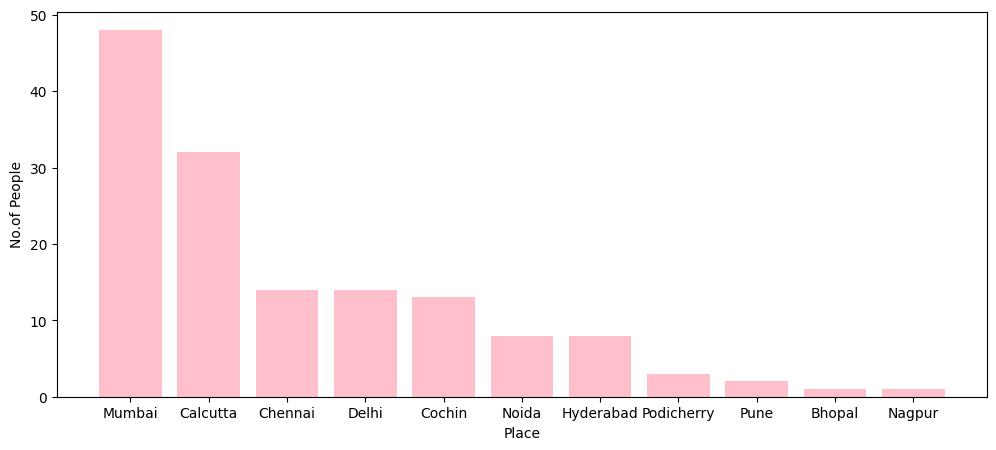

In [39]:

plt.figure(figsize=(12,5))
plt.bar(df5["Place"],df5["No_of_ppl"],color="pink")
plt.xlabel("Place")
plt.ylabel("No.of People")
plt.show()

In [40]:

import numpy as np
df_one_hot_encoded = pd.get_dummies(data = df1, columns = ["Company","Place"])
df_one_hot_encoded 

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5283.47,0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.47,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.00,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.00,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.00,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.00,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.00,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.00,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.00,1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
